<h1><b>Exercise 1</b></h1>
<p>A collection of points is being called a part, and each part will be stored in a numpy array that will be treated as a matrix. Each part will be stored in a list, so part 1's collection of points will be accessess by parts[0].<br>Each part will have the linear transformation A applied to it so that all of its points have been transformed. The resulting points will then be plotted side-by-side to show a before and after.</p>

In [1]:
# import the following packages into the namespace
import numpy as np
import matplotlib.pyplot as plt
# inline figures
%matplotlib inline


In [2]:
# Initial Conditions and Variable Assignments
a = 4
b = 3

# Create the list of points
parts = [np.array([
    [a, a, -a, -a, a],
    [a, -a, -a, a, a]
]), np.array([
    [1-a, -a/4, -a/4, 1-a, 1-a],
    [a-1, a-1, a/2, a/2, a-1]
]), np.array([
    [a/4, a-1, a-1, a/4],
    [a-1, a/2, a-1, a/2]
]), np.array([
    [a-1, a-1, 1-a, 1-a],
    [-a/4, -a/2, -a/2, -a/4]
])]

# Define the transformation matrix
A = 1/b * np.array([
    [b, 1],
    [-1, 1]
])

In [3]:
# Apply the transformation matrix to all the points in each part
transformed_parts = []
for part in parts:
    transformed_parts.append(np.matmul(A, part))

In [4]:
def plot_points(axis, title, parts):
    '''
    Will plot the given points on the given axis with the given title

    Paramters:
    ----------
    axis:
        - The axis for the subplot to plot the points onto
    
    title:
        - The title to give the subplot

    parts:
        - A list of parts where each part is the points stored in a matrix
    '''
    # Limit the axis so they are equal for both subplots
    axis.set_xlim([-a-2, a+2])
    axis.set_ylim([-a-1, a+1])
    # Set a title for the subplot
    axis.set_title(title)

    # For each of the parts
    for num, part in enumerate(parts):
        # Transpose so that each row is an x and y coord
        transposed = part.T
        # If it is part 3
        if num == 2: # Because part 3 has a line break
            # For each of the 4 points plot a line between them
            for i in range(0, 4, 1):
                if i == 1: # Is it the one that needs the line break? - if so, skip
                    continue
                axis.plot(transposed[:, 0][i:i+2], transposed[:, 1][i:i+2], 'r')
        else:
            # For each of the 4 points plot a line between them
            for i in range(0, 4, 1):
                axis.plot(transposed[:, 0][i:i+2], transposed[:, 1][i:i+2], 'r')

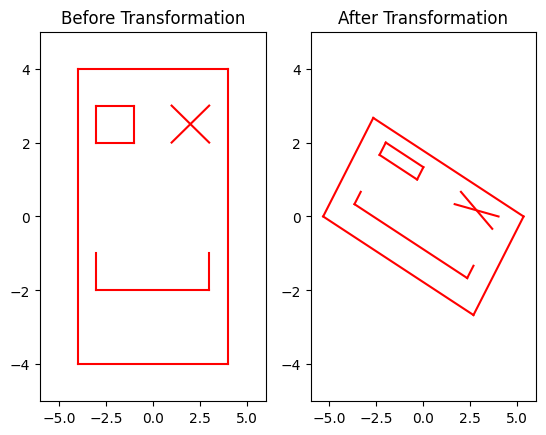

In [5]:
# Plot the parts
figure, axis = plt.subplots(1, 2)

plot_points(axis[0], "Before Transformation", parts)
plot_points(axis[1], "After Transformation", transformed_parts)
    
plt.show()

<h2>Explanation of results</h2>
<p>As you can see by the before transformation plot, the collection of points create a smiley face where one eye is a cross. <br>
The matrix A defines a linear transformation that will scale and shear the input points. The x-cordinates for each point will be scaled by a factor <i>b</i> and the y-coordinate will be sheared by subtracting a the x-coordinate scaled by 1/<i>b</i></p>

<h1><b>Exercise 2</b></h1>
<p>Derivation of analytical solution</p>

Find $P(x)$ and $Q(x)$:

&emsp;&emsp;$\frac{dy}{dx} + P(x)y= Q(x)$

&emsp;&emsp;$\frac{dy}{dx} = x + \frac{y}{5} \Rightarrow \frac{dy}{dx} - \frac{1}{5}y= x$

&emsp;&emsp;$\therefore P(x) = -\frac{1}{5}, Q(x) = x$


Find $\rho (x)$, the integrating factor:

&emsp;&emsp;$\rho (x) = e^{\int P(x)\, dx} = e^{\int -\frac{1}{5}\, dx} = e^{-\frac{x}{5}}$

Multiply both sides by $\rho (x)$

&emsp;&emsp;$e^{-\frac{x}{5}} \frac{dy}{dx} - \frac{e^{\frac{x}{5}}}{5}y = e^{-\frac{x}{5}} x$

Using the product rule in reverse:

&emsp;&emsp;$\frac{d}{dx} (e^{-\frac{x}{5}} y) = e^{-\frac{x}{5}} x$

And then integrating both sides with respect to x:

&emsp;&emsp;$ \int\frac{d}{dx} (e^{-\frac{x}{5}} y)\, dx = \int e^{-\frac{x}{5}} x\, dx$


$\int e^{-\frac{x}{5}} x\, dx$ is solved using integration by parts techniques:

&emsp;&emsp;Let $u = x$ and let $\frac{dv}{dx} = e^{-\frac{x}{5}}$

&emsp;&emsp;$\frac{du}{dx} = 1, v = -5e^{-\frac{x}{5}}$

&emsp;&emsp;$\Rightarrow \int e^{-\frac{x}{5}} x\, dx = -5xe^{-\frac{x}{5}} - \int -5e^{-\frac{x}{5}}\, dx$

&emsp;&emsp;$\int e^{-\frac{x}{5}} x\, dx = -5xe^{-\frac{x}{5}} - 25e^{-\frac{x}{5}}$

Putting it back into the original equation and adding the constant of integration, we get:

&emsp;&emsp;$e^{-\frac{x}{5}} y = -5xe^{-\frac{x}{5}} - 25e^{-\frac{x}{5}} + c$

Then dividing by $\rho (x)$:

&emsp;&emsp;$ y = -5x -25 + ce^{\frac{x}{5}}$


Since we are told $y(0) = -3$

&emsp;&emsp;$(-3) = -5(0)-25+ce^{\frac{(0)}{5}}$

&emsp;&emsp;$\Rightarrow 25-3=c=22$

And the final equation is:

&emsp;&emsp;$y = -5x-25+22e^{\frac{x}{5}}$


In [6]:
# Initial Conditions
x0 = 0
y0 = -3

In [7]:
# Define Functions
def gradient(x, y):
    '''
    Evaluates a gradient at a point

    Parameters:
    -----------
    x:
        - x value to evaluate the gradient at
    y:
        - y value to evaluate the gradient at

    Returns:
    ---------
    Returns the value of the gradient at the input point
    '''
    return x + y/5

def analytical_solution(interval):
    '''
    Analytically solves the equation 

    Parameters:
    -----------
    interval:
        - A list containing the beginning and end of the interval to evaluate the equation at

    Returns:
    --------
    Returns a list of points generated from the analytical solution
    '''
    # Generate x coords
    x = np.arange(interval[0], interval[1]+0.01, 0.01)
    # Calculate y values and store in a list of tuples
    points = (x, -5*x-25+22*np.exp(x/5))
    # Return as a list of tuples, (x, y)
    return [*zip(*points)]

def numerical_solution(h, interval):
    '''
    Numerically solves the equation within the given interval for the given step size

    Parameters:
    ----------
    h:
        - The step size used when approximating
    
    interval:
        - A list containing the beginning and end of the interval to evaluate the equation at

    Returns:
    ---------
    Returns an list of points
    '''
    # Define an output list
    output = []
    # Generate x coords between the two intervals with h spacing
    x = np.arange(interval[0], interval[1]+h, h)
    # Create empty array for y values
    count = int(round(((interval[1] - interval[0])+h)/h))
    y = np.zeros((count,))
    # First y value is the initial y0
    y[0] = y0
    # Add this point to the output list
    output.append((x[0], y[0]))

    # For each of the x coords, find the corresponding y values
    for i, value in enumerate(x):
        # Ignore first index as it's been delt with already
        if i == 0:
            continue
        # Calculate the next y value and add it to the list of points
        y[i] = y[i-1] + gradient(x[i-1], y[i-1])*(h)
        output.append((x[i], y[i]))

    return output

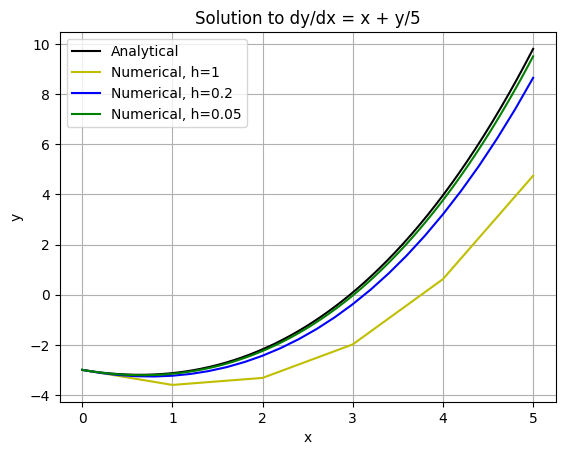

In [8]:
# Set the plot settings
plt.title("Solution to dy/dx = x + y/5")
plt.xlabel("x")
plt.ylabel("y")
interval = [0, 5]

# Plot each of the graphs, remembering to zip and unzip the points into a tuple of x points and a tuple of y points
plt.plot(*zip(*analytical_solution(interval)), color='k', label='Analytical')
plt.plot(*zip(*numerical_solution(1, interval)), color='y', label='Numerical, h=1')
plt.plot(*zip(*numerical_solution(0.2, interval)), color='b', label='Numerical, h=0.2')
plt.plot(*zip(*numerical_solution(0.05, interval)), color='g', label='Numerical, h=0.05')

plt.legend()
plt.grid()
plt.show()

<h2>Comparison of Results</h2>
<p>The next set of code will be used to produce an absolute error plot and a max error over step size plot.<br>Analysis of the results is at the bottom.</p>

In [9]:
def find_actual(x):
    '''
    Finds the actual value of y at x

    Parameters:
    ----------
    x:
        - The value to find y at

    Returns:
    -------
    The y value at x
    '''
    return -5*x-25+22*np.exp(x/5)

def error(approx):
    '''
    Calculate the error between the acutal values and the approximated values

    Paramters:
    ----------
    actual:
        - A list of points that are the actual values from the analytical solution

    approx:
        - A list of points that are approximated by Euler's method

    Returns:
    --------
    A list of points containing errors for each step taken in when approximating
    '''
    errors = []
    
    for value in approx:
        e = abs(find_actual(value[0]) - value[1])
        errors.append((value[0], e))
    
    return errors

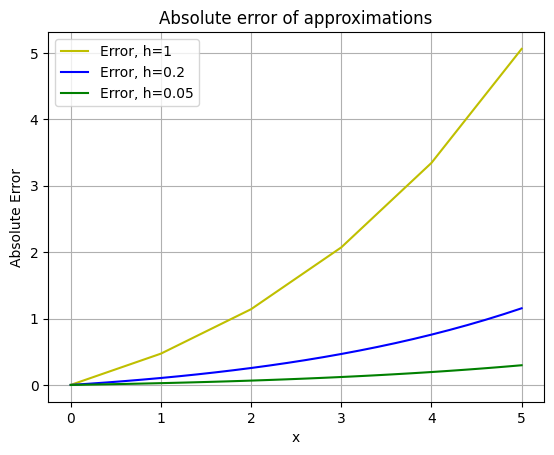

In [10]:
# Set the plot settings for the absolute error plot
plt.title("Absolute error of approximations")
plt.xlabel("x")
plt.ylabel("Absolute Error")

plt.plot(*zip(*error(numerical_solution(1, interval))), color='y', label='Error, h=1')
plt.plot(*zip(*error(numerical_solution(0.2, interval))), color='b', label='Error, h=0.2')
plt.plot(*zip(*error(numerical_solution(0.05, interval))), color='g', label='Error, h=0.05')

plt.legend()
plt.grid()
plt.show()

y-intercept = 1.6212005063044115
gradient = 0.9184193084345555


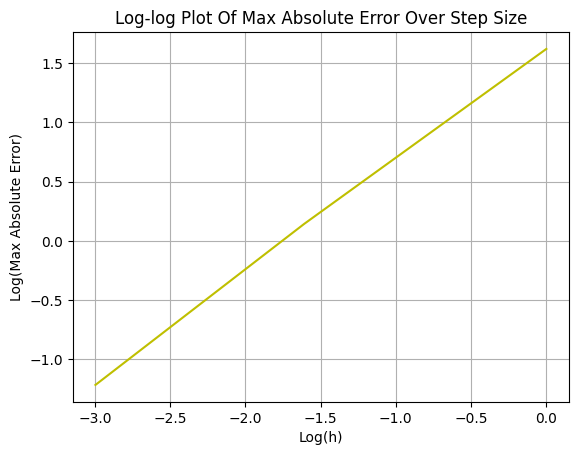

In [11]:
# Set the plot settings for the max absolute error over step size plot
plt.title("Log-log Plot Of Max Absolute Error Over Step Size")
plt.xlabel("Log(h)")
plt.ylabel("Log(Max Absolute Error)")

max_errors = [max([*zip(*error(numerical_solution(1, interval)))][1]),
              max([*zip(*error(numerical_solution(0.2, interval)))][1]), 
              max([*zip(*error(numerical_solution(0.05, interval)))][1])]

plt.plot(np.log([1, 0.2, 0.05]), np.log(max_errors), color='y', label='Error over step size, max')

print("y-intercept =", np.log(max_errors)[0])
print("gradient =", (np.log(max_errors)[0]-np.log(max_errors)[1])/(np.log(1) - np.log(0.2)))

plt.grid()
plt.show()

From the initial plot, it is quite obvious that the approximated values for the equation deviate from the actual solution. This is expected because you take a discrete step in the direction of the gradient at that point, rather than continous one. It also shows that a larger value of h has a worse approximation, this is because you end up taking a bigger discrete step meaning you deviate quicker.

The absolute error graph shows that all of the approximations have an error which grows over the course of the approximation. It shows that when h is larger, the rate at which the error grows is quicker, which can be explained by the larger step repeatedly being taken, meaning that the prediction also gets worse over the interval.

The Log-log plot for max absolute error over step size is a straight line, so the equation for the max error for a given step size can be described by the equation $O(h) = ah^k.$<br>Due to a y-intercept of 1.6212005063044115 we can find a by:<br>

&emsp;&emsp;$log(a) = 1.6212005063044115$

&emsp;&emsp;$a = 5.059160226$

&emsp;&emsp;so $a = 5.059$ (3 d.p)

And due to a gradient of 0.9184193084345555:<br>

&emsp;&emsp;$k = 0.9184193084345555$

&emsp;&emsp;$k = 0.918$ (3 d.p)

Therefore the equation for the max error given a step size can be described by:

&emsp;&emsp;$O(h) = 5.059h^{0.918}$

This means that there is almost a linear relationship between step size and the max error because of how close to 1 the value for k is. Thus the max error for h=1 is about 5 times greater than the max error for h=0.2 and the max error for h=0.2 is about 4 times greater than that for h=0.05.
